<a href="https://colab.research.google.com/github/kowama/BT-real-estate/blob/master/traffics-sign-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
folder = 'Training'
path = Path('/content/drive/My Drive/Dataset/Training')
dest = path/folder

In [0]:
classes = ['00002','00007','00010','00013','00014','00015','00016','00019','00020','00021','00022','00025','00031','00032','00034','00035','00036','00037','00040','00041','00045','00046','00047','00048','00049','00056']


In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".",valid_pct=0.2,ds_tfms=get_transforms(),num_workers=4, size=224).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

In [7]:
data.classes

['00002',
 '00007',
 '00010',
 '00013',
 '00014',
 '00015',
 '00016',
 '00019',
 '00020',
 '00021',
 '00022',
 '00025',
 '00031',
 '00032',
 '00034',
 '00035',
 '00036',
 '00037',
 '00040',
 '00041',
 '00045',
 '00046',
 '00047',
 '00048',
 '00049',
 '00056']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

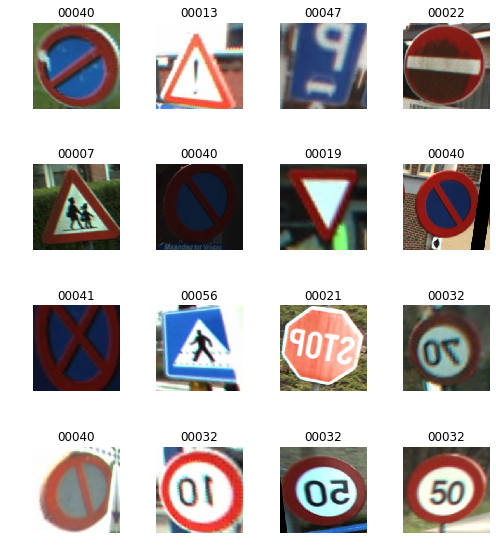

In [8]:
data.show_batch(rows=4,figsize=(7,8))

In [9]:
learn = cnn_learner(data, models.resnet34,metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 20.1MB/s]


In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

KeyboardInterrupt: ignored

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.load('stage-1')

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot() 

In [0]:
learn.fit_one_cycle(4,max_lr=slice(1e-04,1e-03))

In [0]:
learn.save('stage-2')

In [0]:
from fastai.widgets import *


In [0]:
from PIL import Image
import requests
from StringIO import StringIO

response = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/France_road_sign_AB4.svg/1200px-France_road_sign_AB4.svg.png')
img = Image.open(StringIO(response.content))

In [0]:
img

In [0]:
pred_class, pred_idx, outputs = learn.predict(img)

print(pred_class)